In [1]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


## Setting up the simulator:

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2019-05-17 14:42:47 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-05-17 14:42:47 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-05-17 14:42:47 INFO: Setting time scale factor to 1.0.
2019-05-17 14:42:47 INFO: Setting machine time step to 1000 micro-seconds.


['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


## Setting up the populations:

In [3]:
# Define Input neuron
# input = sim.Population(1,sim.SpikeSourceArray(spike_times=[10, 200,210,215, 217, 220, 225, 325, 456]),label="input")
#input = sim.Population(1,sim.SpikeSourceArray(spike_times=[2]),label="input")
#input = sim.Population(1, sim.SpikeSourcePoisson(rate=0), label="Input")
input = sim.Population(1, sim.SpikeSourcePoisson(), label="Input")

# Define output neuron
pop_1 = sim.Population(1,sim.IF_curr_exp(),label="pop_1")

# Connect Input Neuron with Output neuron
input_proj=sim.Projection(input,pop_1,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=5,delay=1))

pop_1.record(["spikes","v"])
input.record(["spikes"])

## Simulate:

In [4]:
simtime = 100000
sim.run(simtime)

2019-05-17 14:42:47 INFO: Simulating for 100 1000ms timesteps using a hardware timestep of 1000000us
2019-05-17 14:42:47 INFO: Starting execution process
2019-05-17 14:42:52 INFO: Time 0:00:03.800837 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-05-17 14:43:04 INFO: Time 0:00:11.819079 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-05-17 14:43:11 INFO: Time 0:00:07.437476 taken by PartitionAndPlacePartitioner
Created spalloc job 4642681
2019-05-17 14:43:11 INFO: Created spalloc job 4642681
Waiting for board power commands to complete.
2019-05-17 14:43:11 INFO: Waiting for board power commands to complete.
2019-05-17 14:43:20 INFO: Time 0:00:08.720050 taken by SpallocAllocator
2019-05-

Loading Tags
|0%                          50%                         100%|
2019-05-17 14:43:32 INFO: Time 0:00:00.020802 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2019-05-17 14:43:32 INFO: Time 0:00:00.035676 taken by WriteMemoryIOData
Executing data specifications and loading data
|0%                          50%                         100%|
2019-05-17 14:43:32 INFO: Time 0:00:00.140568 taken by HostExecuteDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2019-05-17 14:43:33 INFO: Time 0:00:00.541481 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2019-05-17 14:43:33 INFO: Time 0:00:00.080447 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2019-05-17 14:43:34 INFO: Time 0:00:01.439194 taken by LoadExecutableImages
Reading Routi

100000.0

## Print:

In [5]:
# Input neuron
neo_input=input.get_data(variables=["spikes"])

spikes_input=neo_input.segments[0].spiketrains
print(spikes_input)
print( len(spikes_input[0]) )

# Pop1 neuron
neo_pop1=pop_1.get_data(variables=["spikes","v"])

v_pop1=neo_pop1.segments[0].filter(name='v')[0]
#print(v_pop1)

spikes_pop1=neo_pop1.segments[0].spiketrains
#print(spikes_pop1)

sim.end()

Getting spikes for Input
|0%                          50%                         100%|
Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|


[<SpikeTrain(array([  413.,  1052.,  2130.,  4162.,  4237.,  4566.,  8773.,  9268.,
        9388., 10728., 11012., 12072., 12200., 13052., 13769., 14365.,
       14371., 14817., 16634., 17114., 17142., 17620., 18478., 19085.,
       20289., 20981., 23509., 23711., 23768., 24581., 24991., 25805.,
       28055., 28417., 29177., 29266., 31339., 33996., 34425., 34477.,
       35506., 35876., 37562., 38451., 38782., 39125., 40885., 41928.,
       43991., 44464., 46372., 46557., 46958., 47243., 54230., 54413.,
       59230., 59890., 62175., 66725., 67112., 67140., 67575., 70907.,
       71001., 71912., 72712., 73827., 73980., 74133., 74255., 76928.,
       77233., 77516., 78075., 79458., 79858., 80405., 81729., 84158.,
       84967., 85033., 87751., 92083., 92797., 93436., 93950., 94413.,
       96163., 96651., 97461., 99011.]) * ms, [0.0 ms, 100000.0 ms])>]
92


## Plot:

<IPython.core.display.Javascript object>


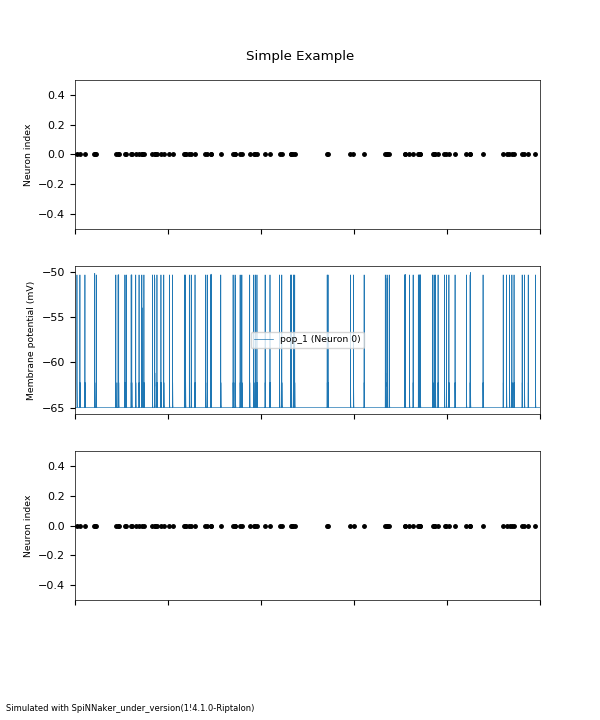

In [6]:
plot.Figure(
    #plot spikes for input population
    plot.Panel(spikes_input, yticks=True, markersize=5, xlim =(0, simtime)),
    
    #plot voltage for first ([0]) neuron
    plot.Panel(v_pop1, ylabel="Membrane potential (mV)", data_labels=[pop_1.label], yticks=True, xlim =(0, simtime)),
    
    #plot spikes for pop1 population
    plot.Panel(spikes_pop1, yticks=True, markersize=5, xlim =(0, simtime)),
    
    title="Simple Example",
    annotations="Simulated with {}".format(sim.name())
)
plt.show()